<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

Inspiration drawn from [TaskMartix aka Visual ChatGPT](https://github.com/microsoft/TaskMatrix)

In [1]:
#| echo: false
#| output: asis
show_doc(format_image)

---

[source](https://gitlab.com/animalequality/lv-recipe-chatbot/blob/main/lv_recipe_chatbot/ingredient_vision.py#L26){target="_blank" style="float:right; font-size:smaller"}

### format_image

>      format_image (image:str)

|    | **Type** | **Details** |
| -- | -------- | ----------- |
| image | str | Image file path |

In [2]:
#| echo: false
#| output: asis
show_doc(BlipImageCaptioning)

---

[source](https://gitlab.com/animalequality/lv-recipe-chatbot/blob/main/lv_recipe_chatbot/ingredient_vision.py#L41){target="_blank" style="float:right; font-size:smaller"}

### BlipImageCaptioning

>      BlipImageCaptioning (device:str)

Useful when you want to know what is inside the photo.

In [3]:
#| echo: false
#| output: asis
show_doc(BlipImageCaptioning.inference)

---

[source](https://gitlab.com/animalequality/lv-recipe-chatbot/blob/main/lv_recipe_chatbot/ingredient_vision.py#L60){target="_blank" style="float:right; font-size:smaller"}

### BlipImageCaptioning.inference

>      BlipImageCaptioning.inference
>                                     (image:<module'PIL.Image'from'/home/evylz/
>                                     AnimalEquality/lv-recipe-
>                                     chatbot/env/lib/python3.10/site-
>                                     packages/PIL/Image.py'>)

|    | **Type** | **Details** |
| -- | -------- | ----------- |
| image | PIL.Image |  |
| **Returns** | **str** | **Caption for the image** |

In [4]:
#| echo: false
#| output: asis
show_doc(BlipVQA)

---

[source](https://gitlab.com/animalequality/lv-recipe-chatbot/blob/main/lv_recipe_chatbot/ingredient_vision.py#L71){target="_blank" style="float:right; font-size:smaller"}

### BlipVQA

>      BlipVQA (device:str)

BLIP Visual Question Answering
Useful when you need an answer for a question based on an image.
Examples:
    what is the background color of this image, how many cats are in this figure, what is in this figure?

In [5]:
#| echo: false
#| output: asis
show_doc(BlipVQA.inference)

---

[source](https://gitlab.com/animalequality/lv-recipe-chatbot/blob/main/lv_recipe_chatbot/ingredient_vision.py#L89){target="_blank" style="float:right; font-size:smaller"}

### BlipVQA.inference

>      BlipVQA.inference
>                         (image:<module'PIL.Image'from'/home/evylz/AnimalEquali
>                         ty/lv-recipe-chatbot/env/lib/python3.10/site-
>                         packages/PIL/Image.py'>, question:str)

|    | **Type** | **Details** |
| -- | -------- | ----------- |
| image | PIL.Image |  |
| question | str |  |
| **Returns** | **str** | **Answer to the query on the image** |

In [ ]:
sample_images = os.listdir(SAMPLE_IMG_DIR)
sample_images

['veggie-fridge.jpeg',
 'veg-groceries-table.jpg',
 'fridge-splendid.jpg',
 'neat-veg-groceries.jpg',
 'veg-groceries-table.jpeg',
 'Fruits-and-vegetables-one-a-table.jpg']

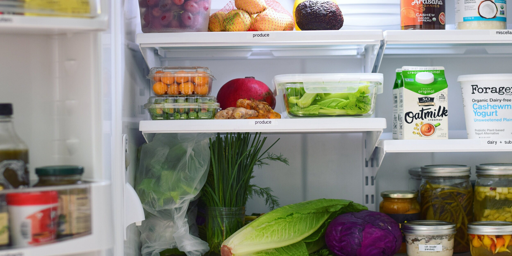

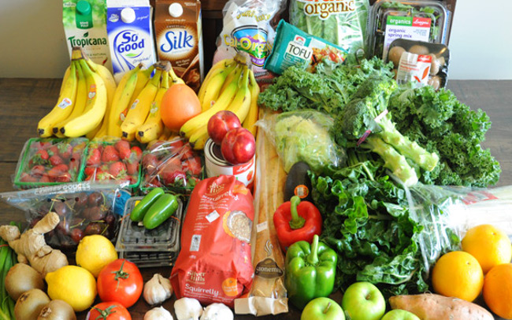

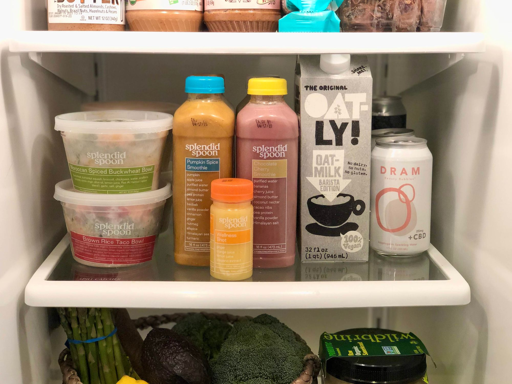

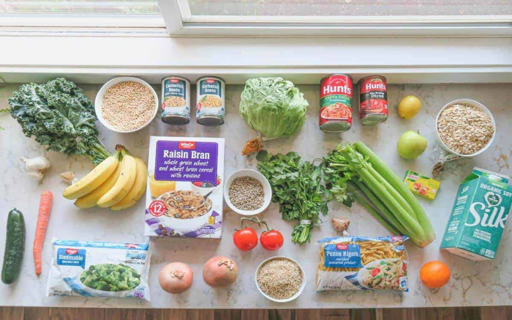

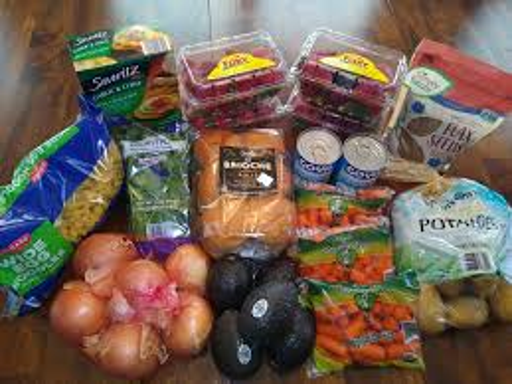

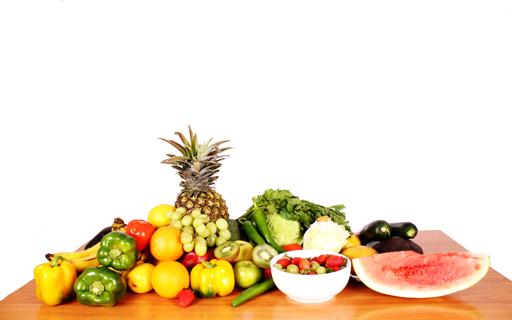

In [ ]:
for img in sample_images:
    display(format_image(SAMPLE_IMG_DIR / img))

The process:

1. Format image
2. Get description (caption)
3. Pass caption and ingredient queries to VQA

In [ ]:
#| eval: false
vqa = BlipVQA("cpu")
img_cap = BlipImageCaptioning("cpu")

CPU times: user 11.4 s, sys: 7.42 ms, total: 11.4 s
Wall time: 1.19 s


'a refrigerator with food inside'

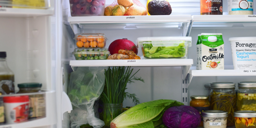

CPU times: user 13.5 s, sys: 7.5 ms, total: 13.5 s
Wall time: 1.36 s


'a table with a variety of fruits and vegetables'

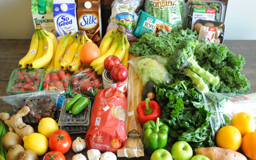

CPU times: user 12 s, sys: 0 ns, total: 12 s
Wall time: 1.21 s


'a refrigerator filled with food and drinks'

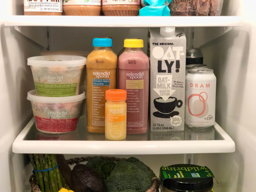

CPU times: user 12.5 s, sys: 0 ns, total: 12.5 s
Wall time: 1.27 s


'a counter with various foods on it'

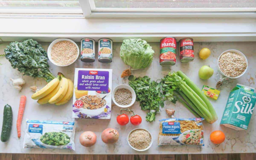

CPU times: user 9.25 s, sys: 7.71 ms, total: 9.25 s
Wall time: 936 ms


'a wooden table'

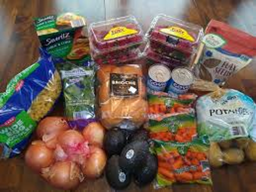

CPU times: user 15.7 s, sys: 7.66 ms, total: 15.7 s
Wall time: 1.58 s


'a table with a variety of fruits and vegetables'

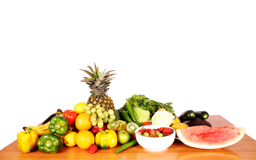

In [ ]:
#| eval: false
for img in sample_images:
    img = format_image(SAMPLE_IMG_DIR / img)

    display(desc, img.resize((int(img.size[0] * 0.5), int(img.size[1] * 0.5))))

CPU times: user 7.67 s, sys: 12.1 ms, total: 7.68 s
Wall time: 779 ms
a refrigerator with food inside
cabbage lettuce onion
apples
rice
yes


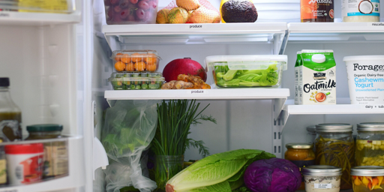

CPU times: user 10.5 s, sys: 8.13 ms, total: 10.5 s
Wall time: 1.06 s
a table with a variety of fruits and vegetables
broccoli and tomatoes
bananas apples oranges
potatoes
yes


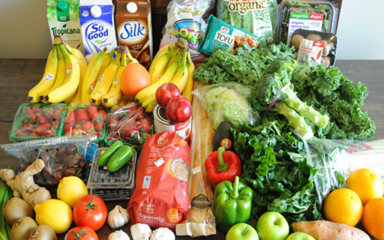

CPU times: user 11.7 s, sys: 0 ns, total: 11.7 s
Wall time: 1.18 s
a refrigerator filled with food and drinks
broccoli and zucchini
bananas
rice
yes


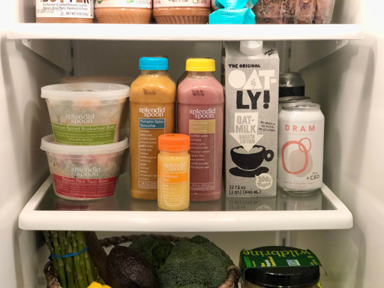

CPU times: user 11.5 s, sys: 12.2 ms, total: 11.5 s
Wall time: 1.16 s
a counter with various foods on it
carrots and broccoli
apples bananas and tomatoes
rice
yes


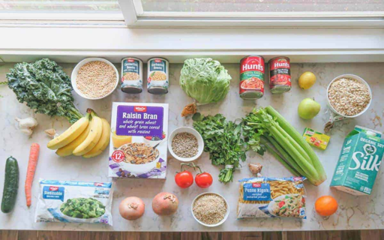

CPU times: user 9.62 s, sys: 4.22 ms, total: 9.63 s
Wall time: 973 ms
a wooden table
potatoes and carrots
apples
potatoes
yes


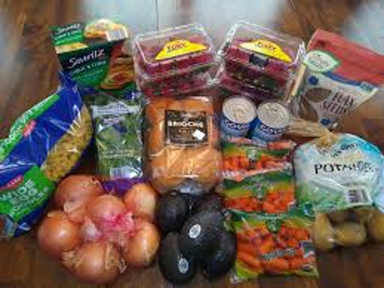

CPU times: user 11.1 s, sys: 8.23 ms, total: 11.1 s
Wall time: 1.12 s
a table with a variety of fruits and vegetables
peppers broccoli and squash
watermelon limes and pineapple
rice
no


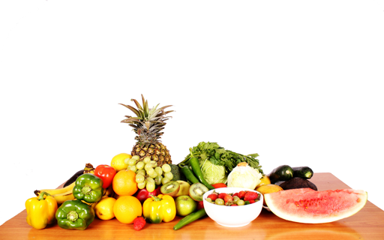

In [ ]:
#| eval: false
for img in sample_images:
    img = format_image(SAMPLE_IMG_DIR / img)
    desc = img_cap.inference(img)

    answer += "\n" + vqa.inference(
        img, f"What are three of the fruits seen in the image if any?"
    )
    answer += "\n" + vqa.inference(
        img, f"What grains and starches are in the image if any?"
    )
    answer += "\n" + vqa.inference(img, f"Is there plant-based milk in the image?")
    print(
        f"""{desc}
{answer}"""
    )
    display(img.resize((int(img.size[0] * 0.75), int(img.size[1] * 0.75))))

In [6]:
#| echo: false
#| output: asis
show_doc(VeganIngredientFinder)

---

[source](https://gitlab.com/animalequality/lv-recipe-chatbot/blob/main/lv_recipe_chatbot/ingredient_vision.py#L106){target="_blank" style="float:right; font-size:smaller"}

### VeganIngredientFinder

>      VeganIngredientFinder ()

Initialize self.  See help(type(self)) for accurate signature.

In [7]:
#| echo: false
#| output: asis
show_doc(VeganIngredientFinder.list_ingredients)

---

[source](https://gitlab.com/animalequality/lv-recipe-chatbot/blob/main/lv_recipe_chatbot/ingredient_vision.py#L111){target="_blank" style="float:right; font-size:smaller"}

### VeganIngredientFinder.list_ingredients

>      VeganIngredientFinder.list_ingredients (img:str)

|    | **Type** | **Details** |
| -- | -------- | ----------- |
| img | str | Image file path |
| **Returns** | **str** |  |

In [ ]:
#| eval: false
vegan_ingred_finder = VeganIngredientFinder()
vegan_ingred_finder.list_ingredients(SAMPLE_IMG_DIR / sample_images[0])

'cabbage lettuce onion\napples\nrice\nplant-based milk'